In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from ast import literal_eval
import sklearn as sk
import seaborn as sb
import re 
from tqdm import tqdm

In [5]:
data = pd.read_csv("data/train_500.csv")
data = data.drop(["Unnamed: 0", "id", "lang", "language_2", "date"], axis=1)
data.head(5)

,text,word_tokenize,sent_tokenize,count_word,count_sent,word_tokenize_num_of_stopwords,word_tokenize_without_stopwords,word_tokenize_without_stopwords_port,msg_lemmatized,cleanLinks,laenge_saetze,word_per_sent_mean,gender,age,topic,sign
0,This blog is being posted due to the fact that...,"['This', 'blog', 'is', 'being', 'posted', 'due...",['This blog is being posted due to the fact th...,83,4,34,"['This', 'blog', 'posted', 'due', 'fact', 'lit...","['thi', 'blog', 'post', 'due', 'fact', 'littl'...","['This', 'blog', 'posted', 'due', 'fact', 'lit...",This blog is being posted due to the fact that...,4,20.75,male,14,Student,Sagittarius
1,So I have a big fucking interview tomorrow for...,"['So', 'I', 'have', 'a', 'big', 'fucking', 'in...",['So I have a big fucking interview tomorrow f...,88,5,31,"['So', 'I', 'big', 'fucking', 'interview', 'to...","['so', 'i', 'big', 'fuck', 'interview', 'tomor...","['So', 'I', 'big', 'fucking', 'interview', 'to...",So I have a big fucking interview tomorrow for...,5,17.60,male,15,Student,Pisces
2,I was reminded just now of the time Ashley and...,"['I', 'was', 'reminded', 'just', 'now', 'of', ...",['I was reminded just now of the time Ashley a...,574,32,234,"['I', 'reminded', 'time', 'Ashley', 'I', 'drov...","['i', 'remind', 'time', 'ashley', 'i', 'drove'...","['I', 'reminded', 'time', 'Ashley', 'I', 'drov...",I was reminded just now of the time Ashley and...,32,17.94,female,17,Student,Gemini
3,I was checking up on my cousin Dylan and Fanni...,"['I', 'was', 'checking', 'up', 'on', 'my', 'co...","['""I was checking up on my cousin Dylan and Fa...",84,3,32,"['I', 'checking', 'cousin', 'Dylan', 'Fannie',...","['i', 'check', 'cousin', 'dylan', 'fanni', '""s...","['I', 'checking', 'cousin', 'Dylan', 'Fannie',...",I was checking up on my cousin Dylan and Fanni...,3,28.00,female,23,Student,Taurus
4,for the NME interview click urlLink part 1 and...,"['for', 'the', 'NME', 'interview', 'click', 'u...",['for the NME interview click urlLink part 1 a...,12,1,3,"['NME', 'interview', 'click', 'urlLink', 'part...","['nme', 'interview', 'click', 'urllink', 'part...","['NME', 'interview', 'click', 'urlLink', 'part...",for the NME interview click urlLink part 1 and...,1,12.00,female,23,Student,Aquarius


In [6]:
data["gender"].value_counts()

male      11002
female     8498
Name: gender, dtype: int64

In [7]:
data_male = data[data["gender"] == "male"]
data_female = data[data["gender"] == "female"]

In [8]:
data_male.describe()

,count_word,count_sent,word_tokenize_num_of_stopwords,laenge_saetze,word_per_sent_mean,age
count,11002.000000,11002.000000,11002.00000,11002.000000,11002.000000,11002.000000
mean,164.383748,8.025904,61.95419,8.025904,25.200421,26.626795
std,154.043682,7.483871,61.77030,7.483871,34.310678,7.814512
min,1.000000,1.000000,0.00000,1.000000,1.000000,13.000000
25%,43.000000,2.000000,14.00000,2.000000,13.420000,23.000000
50%,116.000000,5.000000,41.00000,5.000000,18.330000,25.000000
75%,239.000000,12.000000,92.00000,12.000000,25.000000,33.000000
max,707.000000,33.000000,335.00000,33.000000,705.000000,48.000000


In [9]:
data_female.describe()

,count_word,count_sent,word_tokenize_num_of_stopwords,laenge_saetze,word_per_sent_mean,age
count,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000,8498.000000
mean,184.072135,8.894681,70.215109,8.894681,29.495157,26.308426
std,156.322218,7.894702,63.674437,7.894702,46.079235,7.289428
min,2.000000,1.000000,0.000000,1.000000,2.000000,13.000000
25%,55.000000,2.000000,19.000000,2.000000,13.810000,23.000000
50%,143.000000,6.000000,53.000000,6.000000,18.500000,25.000000
75%,274.000000,13.000000,105.000000,13.000000,25.750000,27.000000
max,707.000000,33.000000,329.000000,33.000000,704.000000,48.000000


<AxesSubplot:xlabel='count_word', ylabel='Count'>

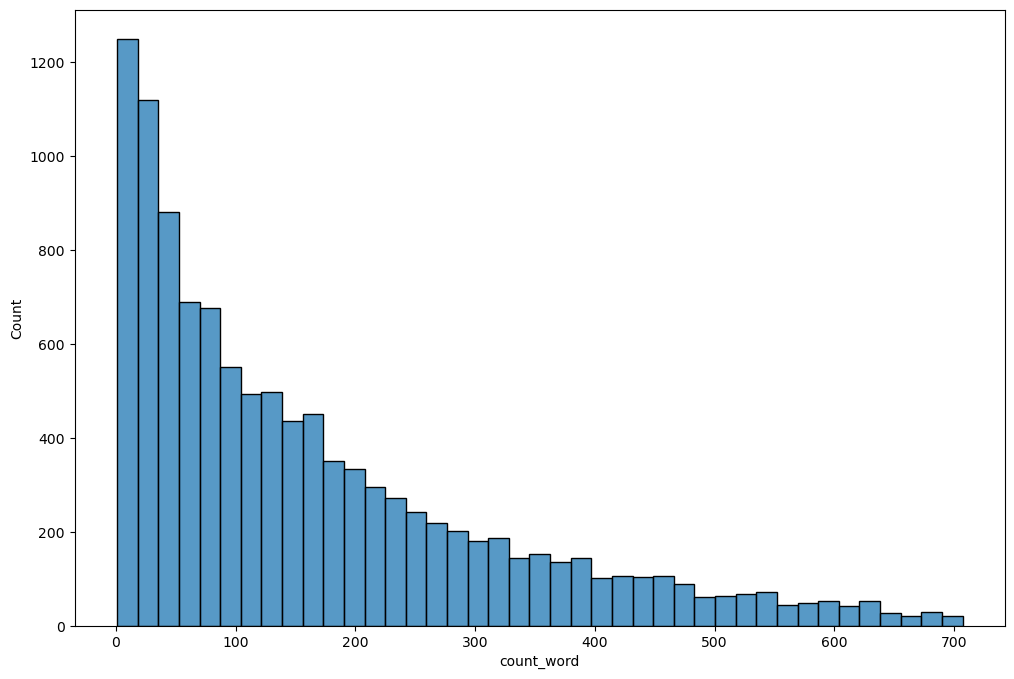

In [12]:
plt.figure(figsize=(12,8))
sb.histplot(x="count_word", data=data_male)

<AxesSubplot:xlabel='count_word', ylabel='Count'>

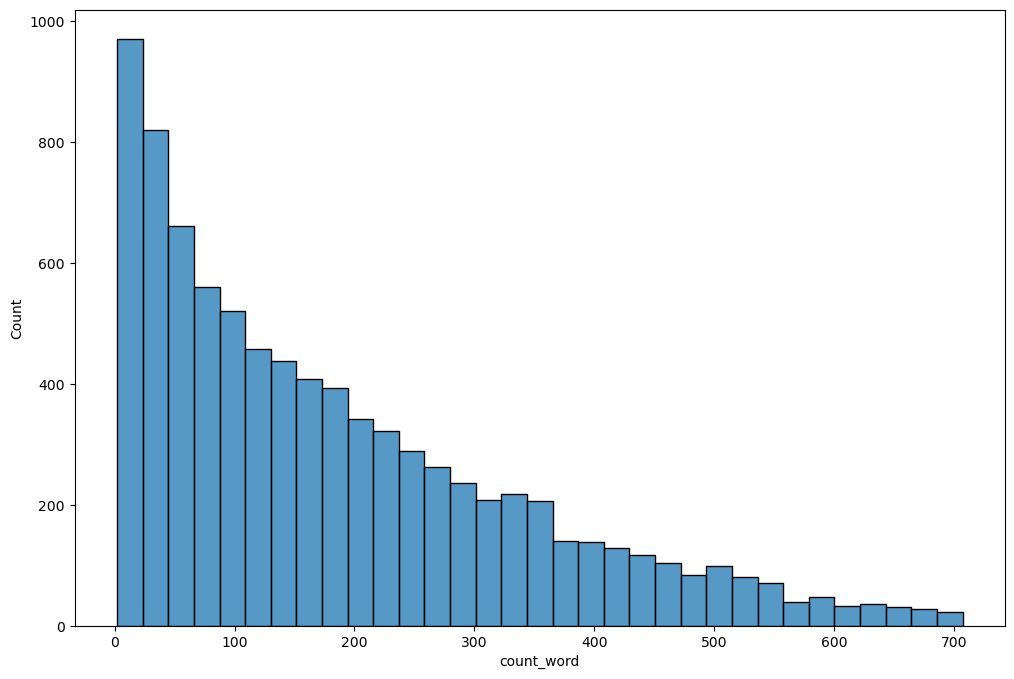

In [13]:
plt.figure(figsize=(12,8))
sb.histplot(x="count_word", data=data_female)

<AxesSubplot:xlabel='count_word', ylabel='Count'>

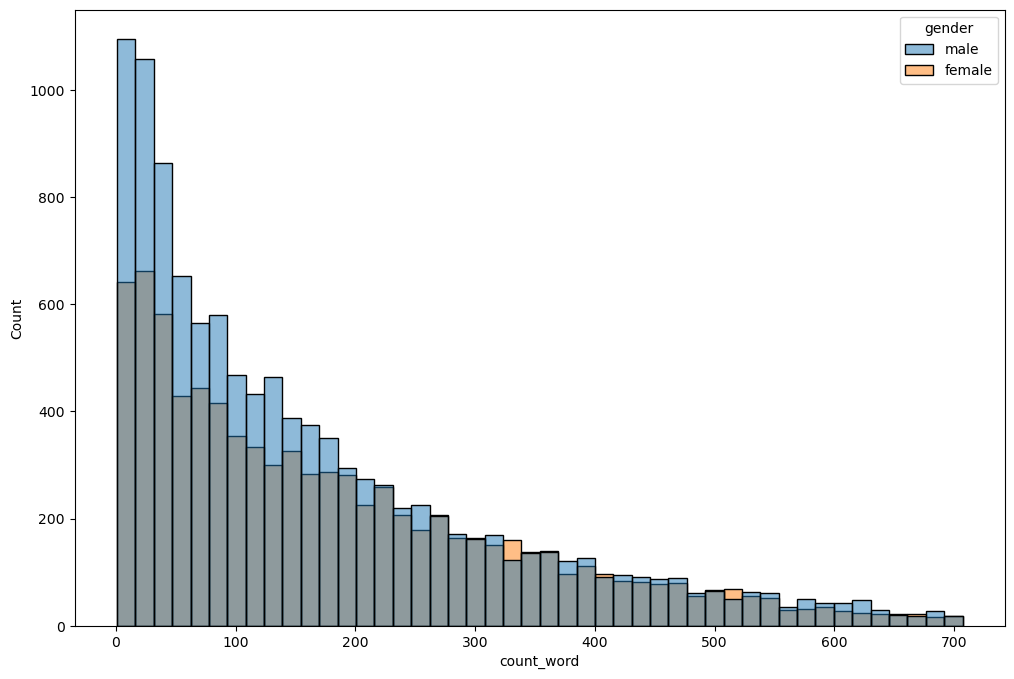

In [14]:
plt.figure(figsize=(12,8))
sb.histplot(x="count_word", data=data, hue="gender")

<AxesSubplot:xlabel='count_sent', ylabel='Count'>

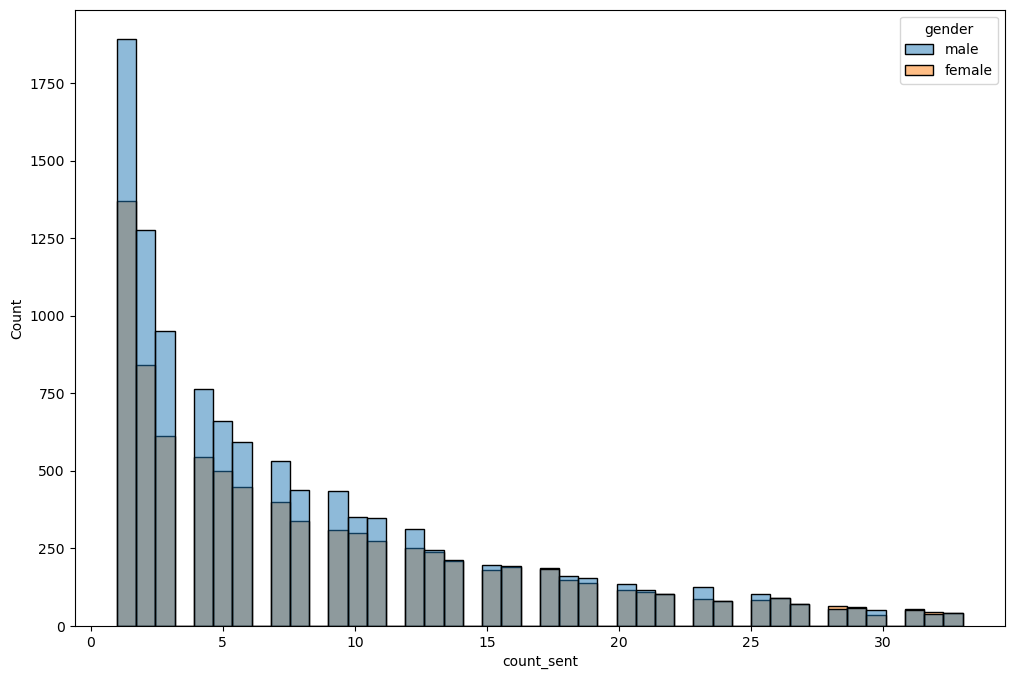

In [15]:
plt.figure(figsize=(12,8))
sb.histplot(x="count_sent", data=data, hue="gender")

In [20]:
def create_word_dict(data, without_stopwords=True, with_stopwords=False):

    if without_stopwords:
        word_dict_without_stopwords = {}
        
    if with_stopwords:
        word_dict_with_stopwords = {}

    stopwordlist = stopwords.words('english')
    for i in tqdm(range(len(data))):
        if without_stopwords:
            for word in literal_eval(data["word_tokenize_without_stopwords"][i]):
                if word in word_dict_without_stopwords.keys():
                    word_dict_without_stopwords[word] += 1
                else:
                    word_dict_without_stopwords[word] = 1

        if with_stopwords:
            for word in literal_eval(data["word_tokenize"][i]):
                if word in word_dict_with_stopwords.keys():
                    word_dict_with_stopwords[word] += 1
                else:
                    word_dict_with_stopwords[word] = 1

    if without_stopwords and with_stopwords:
        return word_dict_without_stopwords, word_dict_with_stopwords
    elif without_stopwords:
        return word_dict_without_stopwords
    elif with_stopwords:
        return word_dict_with_stopwords
    else:
        print("Nothing to return selected")
        return 0

In [21]:
words_without_stopwords, words_with_stopwords = create_word_dict(data, True, True)

100%|██████████| 19500/19500 [00:07<00:00, 2759.87it/s]


In [22]:
def visualize_specific_words(dictionary, limit=10, save_fig=True, save_name="standard_save_name"):
    data_as_df = pd.DataFrame(data={"word": dictionary.keys(), "number": dictionary.values()})
    sorted_df = data_as_df.sort_values(by="number", ascending=False)

    figure = sb.barplot(data=sorted_df[:limit], x="word", y="number", palette="deep")
    figure.set_xlabel("Words")
    figure.set_ylabel("Appearances of the word")

    if save_fig:
        fig = figure.get_figure()
        fig.savefig(str(save_name + ".jpg"))

    return fig.get_figure()

UnboundLocalError: local variable 'fig' referenced before assignment

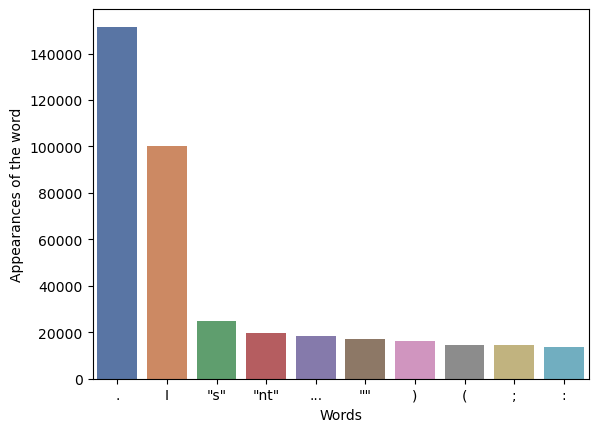

In [25]:
figure_1 = visualize_specific_words(words_without_stopwords, save_fig=False)

In [ ]:
element=[',','.','!','"',')','(']

x = [word  for word in  df['msg_lemmatized'][0] if word not in element]
x